In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

# %matplotlib inline
# %matplotlib notebook

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('cars_cleaned.csv', encoding = "ISO-8859-1", low_memory=False, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32261
Data columns (total 63 columns):
Year                   32262 non-null int64
Model                  32262 non-null object
Specs                  32262 non-null object
MSRP                   32262 non-null int64
EPA_Class              30286 non-null object
Body_Stype             30546 non-null object
Drivetrain             30546 non-null object
Psg_Cp                 32262 non-null int64
Psg_Doors              32262 non-null int64
Front_Wheel_Mat        30293 non-null object
Rear_Wheel_Mat         30293 non-null object
Basic_Miles            29879 non-null float64
Basic_Year             30145 non-null float64
Drivetrain_Miles       29076 non-null float64
Drivetrain_Years       29374 non-null float64
Road_Assist_Miles      19088 non-null float64
Road_Assist_Years      24632 non-null float64
Max_Alt_Cp             22714 non-null float64
Maint_Miles            5519 non-null float64
Maint_Year             5569 non-n

In [3]:
# the following cells were found too high, correct two weight values after checking data 
# at https://www.thecarconnection.com/price/honda_pilot_2019_lx-2wd
print(df.loc[14596, 'Weight'], df.loc[14603, 'Weight'])

df.loc[14596, 'Weight']=4036
df.loc[14603, 'Weight']=4036

8591.0 8232.0


### Check missing cells

In [4]:
# major features selected for the purpose of this practice
essential_features = ['Year', 'Model', 'Specs', 'MSRP', 'Weight', 'HP1', 'Displacement', 'Num_safety']

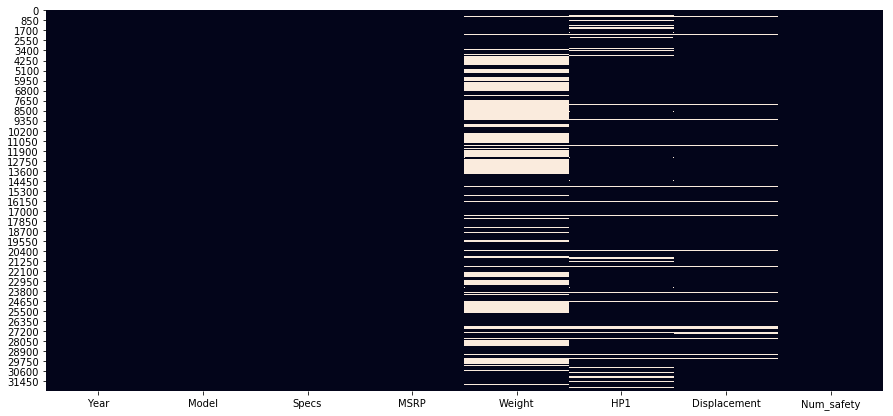

In [5]:
plt.figure(figsize=(15,7))
sns.heatmap(df[essential_features].isnull(), cbar=False)
plt.show()

## Overal price distribution

179


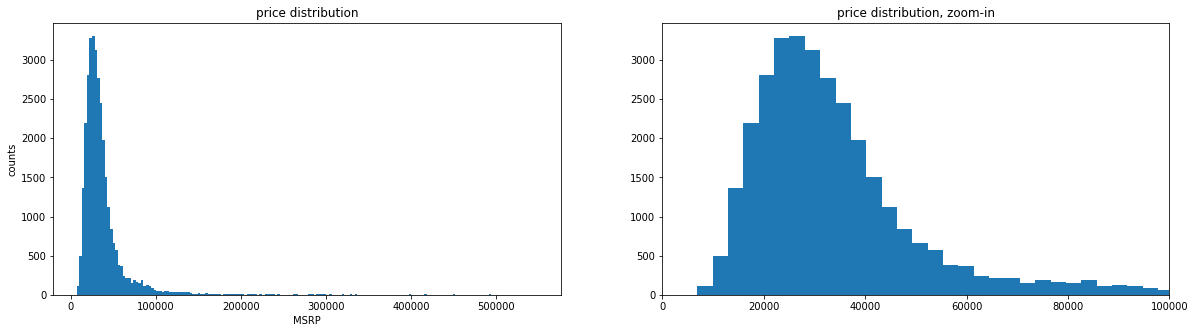

In [6]:
bin_data = np.sqrt(len(df['MSRP']))
bin_num = int(bin_data)
print(bin_num)
plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].hist(df['MSRP'], bins=bin_num)
axs[0].set_xlabel('MSRP')
axs[0].set_ylabel('counts')
axs[0].set_title('price distribution')

axs[1].set_xlim(0, 100000)
axs[1].hist(df['MSRP'], bins=bin_num)
axs[1].set_title('price distribution, zoom-in')

# how to rotate tick labels
# axs[1].tick_params(labelrotation=45)
plt.show()

In [7]:
y, x, _ = plt.hist(df['MSRP'])
print('Most frequent prices are around:', y.max())

Most frequent prices are around: 29295.0


- strong correlation between Horsepower and Displacement, size and displacement, horsepower and MPG

### Drop outliers

In [8]:
# define price outliers and drop them
df_outlier_removed = df[((df['MSRP'] - df['MSRP'].mean()) / df['MSRP'].std()).abs() < 3]
df = df_outlier_removed

## Toyota car prices survey

In [9]:
df_toyota = df[df['Model'].str.contains('Toyota')]

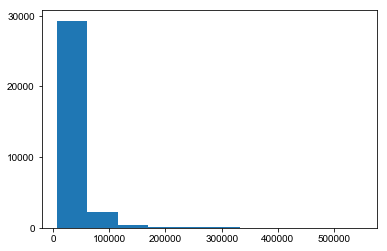

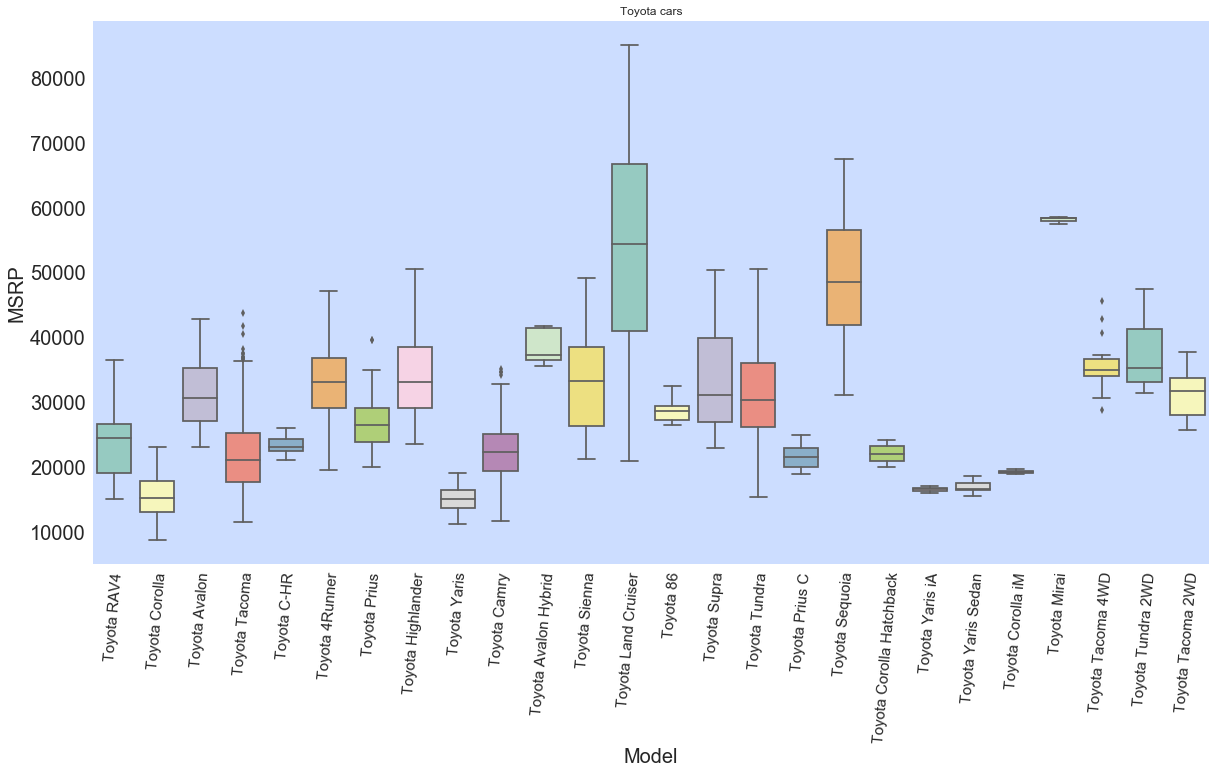

In [10]:
sns.set(rc={"axes.facecolor":"#ccddff",
            "axes.grid":False,
            'axes.labelsize':20,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':15,
            'ytick.labelsize':20})

plt.figure(figsize=(20,10))
sns.boxplot(x="Model", y="MSRP", data=df_toyota, palette="Set3") # notch=True
plt.xticks(rotation=85)
plt.title('Toyota cars')

# plt.text(20, 0, "Box Plot", fontsize = 55, color="black", fontstyle='italic')
plt.show()

## Find high-end and low-end car models from Toyota

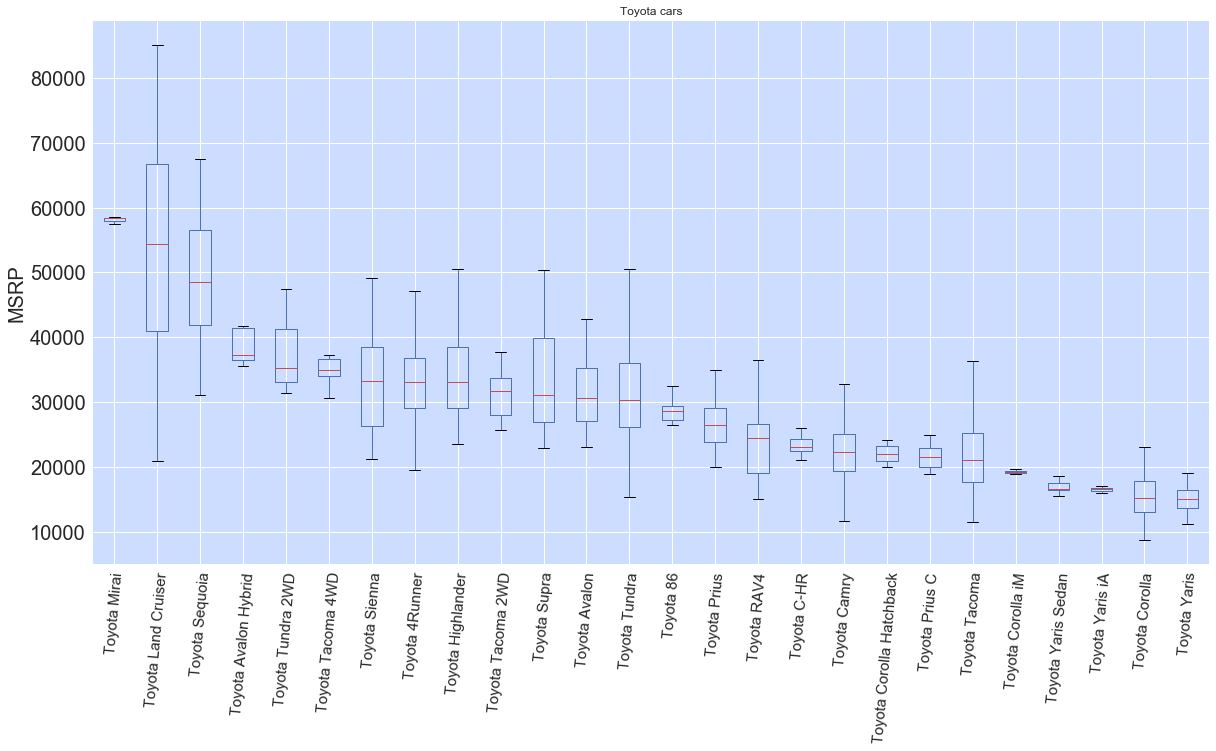

In [11]:
grouped = df_toyota.groupby(['Model'])

df_ = pd.DataFrame({col:vals['MSRP'] for col,vals in grouped})

medians = df_.median()
medians = medians.sort_values(ascending=False)
df_ = df_[medians.index]



df_.boxplot()
plt.xticks(rotation=85)
plt.ylabel('MSRP')
plt.title('Toyota cars')

plt.show()

Luxury Toyota models include Mirai, Land Cruiser, Sequoia, etc. Low-end models include Yaris, Corolla, etc.

## Honda cars prices survey

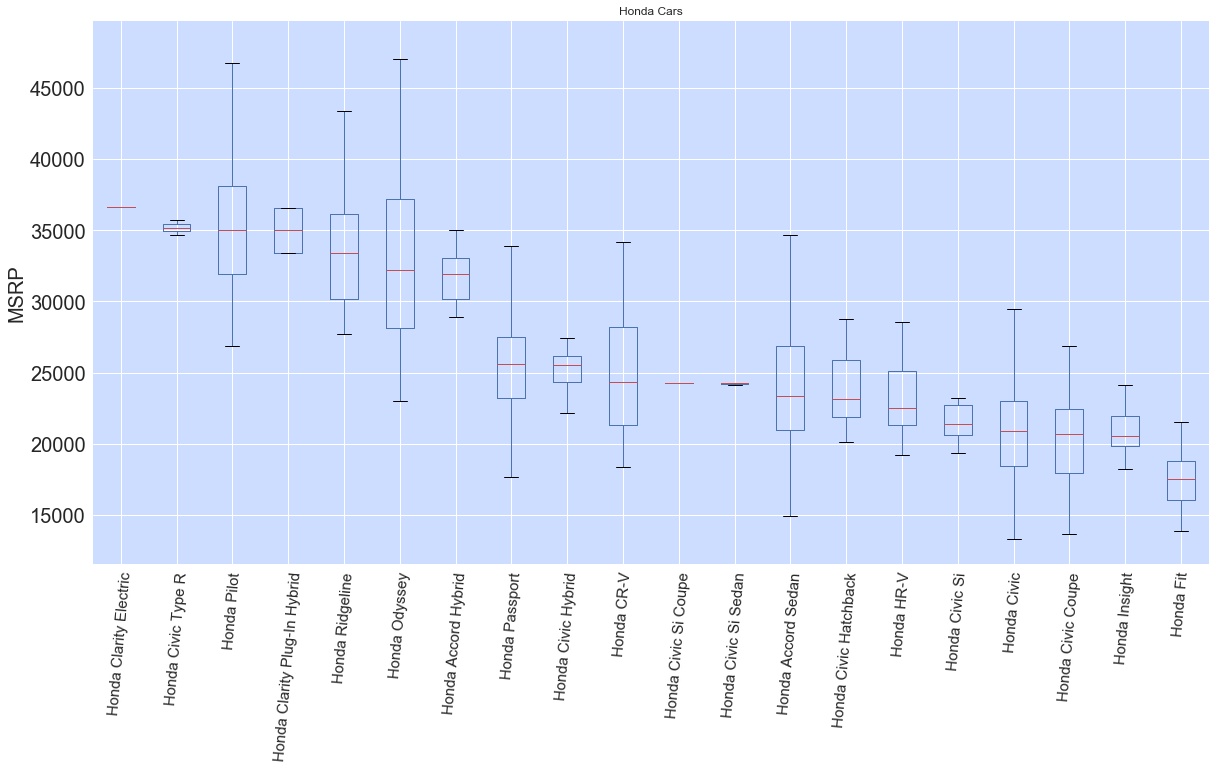

In [12]:

df_honda = df[df['Model'].str.contains('Honda')]
grouped = df_honda.groupby(['Model'])

df_ = pd.DataFrame({col:vals['MSRP'] for col,vals in grouped})

meds = df_.median()
meds = meds.sort_values(ascending=False)
df_ = df_[meds.index]

df_.boxplot()
plt.xticks(rotation=85)
plt.ylabel('MSRP')
plt.title('Honda Cars')

plt.show()

High-end Honda models include Clarity, Civic R, Pilot, etc. Low-end models include Fit, Insight, Civic Coupe, etc.

## Buying guide/options for budget-tight customers (price<$25,000)

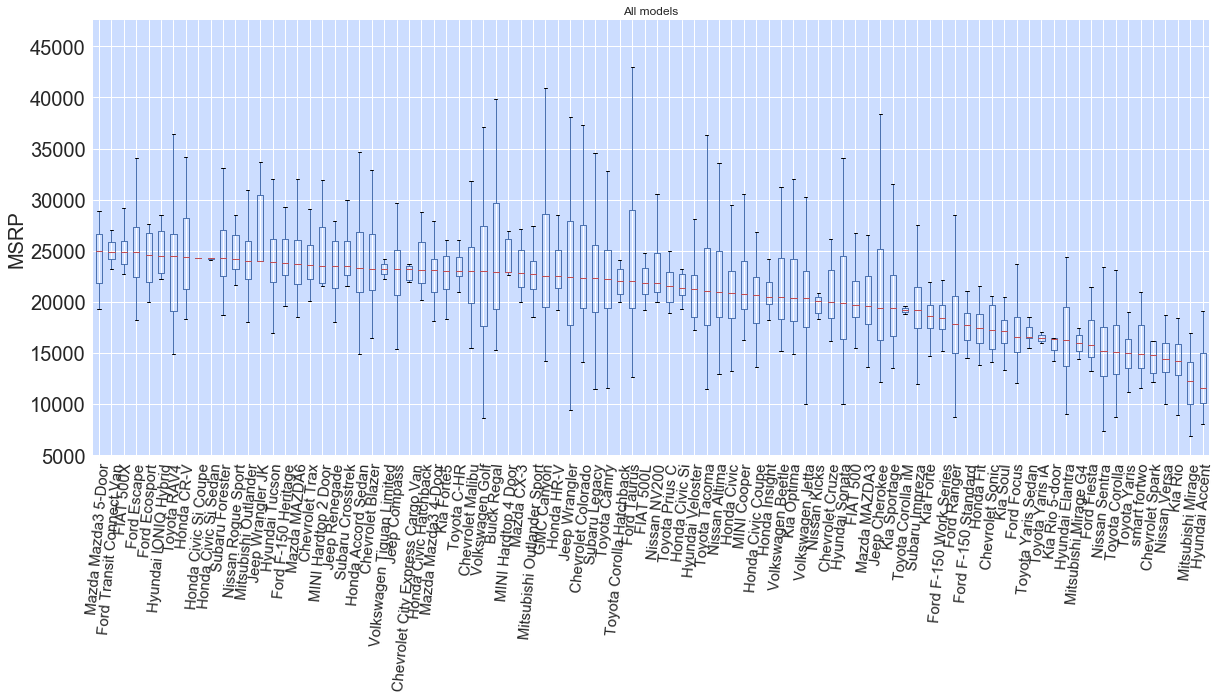

In [13]:
grouped = df.groupby(['Model'])

df_ = pd.DataFrame({col:vals['MSRP'] for col,vals in grouped})

medians = df_.median()
medians = medians[medians < 25000]
medians = medians.sort_values(ascending=False)
df_ = df_[medians.index]
plt.figure(figsize=(20, 8))

df_.boxplot()
plt.xticks(rotation=85)
plt.ylabel('MSRP')
plt.title('All models')

plt.show()

## Hypothesis testing on two low-end models
It was told that both Honda Civic and Hyundai Accent are good quality cars with good awesome deals. The box plot above shows the two models have large overlap in thier price range. Is the difference in their mean price significant or negligible? To answer the question, the following hypothesis testing is conducted.

In [14]:
df_HC = df['MSRP'][df['Model'] == 'Honda Civic']
df_HA = df['MSRP'][df['Model'] == 'Hyundai Accent']

In [15]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / n
    return x, y    

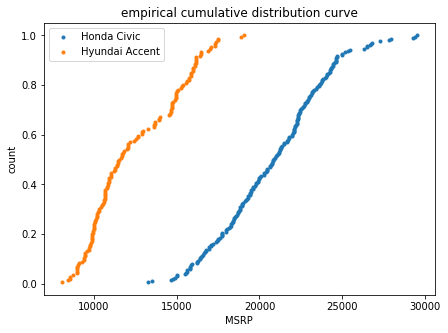

In [16]:
# change back to plt style
sns.reset_orig()

plt.figure(figsize=(7, 5))
x, y = ecdf(df_HC)
plt.plot(x, y, marker='.', linestyle='none', label='Honda Civic')
x, y = ecdf(df_HA)
plt.plot(x, y, marker='.', linestyle='none', label='Hyundai Accent')
plt.xlabel('MSRP')
plt.ylabel('count')
plt.title('empirical cumulative distribution curve')
plt.legend()
plt.show()

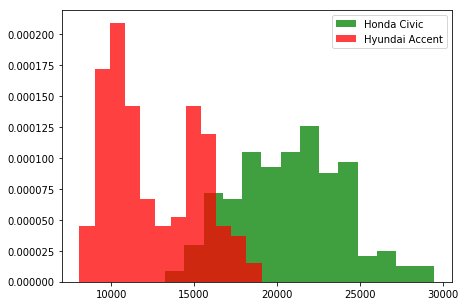

In [17]:
plt.figure(figsize=(7,5))
bins = int(np.sqrt(len(df_HC)))
plt.hist(df_HC, bins, density=True, facecolor='g', alpha=0.75, label='Honda Civic')
bins = int(np.sqrt(len(df_HA)))
plt.hist(df_HA, bins, density=True, facecolor='r', alpha=0.75, label='Hyundai Accent')
plt.legend()
plt.show()

Both the histogram and empirical cumulative distribution curves indicate clear difference in the mean price of the concerned car models.

To quantify the difference of mean statiscally, Bootstrap approach seems to be appropriate.

- H0: There is no difference in the mean price between Hyundai Accent and Honda Civic.
- Ha: There is obviouse difference in the mean price between Hyundai Accent and Honda Civic.
- alpha: 5%

In [18]:
# Two sample mean bootstrap function
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def func(data1, data2):
    return data1.mean() - data2.mean()

sample_mean_diff = func(df_HC, df_HA)
bs_data = draw_perm_reps(df_HC, df_HA, func, size=10000)
p_value = np.sum(bs_data > sample_mean_diff) / len(bs_data)
print('p-value is:', p_value)

p-value is: 0.0


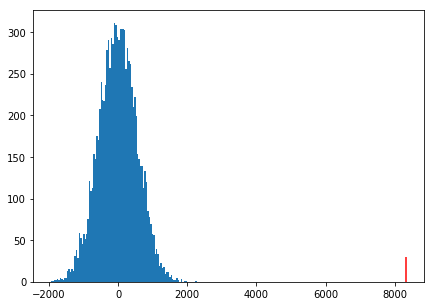

In [19]:
plt.figure(figsize=(7, 5))
bins = int(np.sqrt(len(bs_data)))
plt.hist(bs_data, bins)
plt.vlines(sample_mean_diff, 0, 30, color='r')
plt.show()

p-value is zero, therefore we reject the null hypothesis and approve the sharp difference in mean. The bootstrap results is ploted in the above figure, stronly supporting there is signicant difference in mean.

## Explore the correlation of features

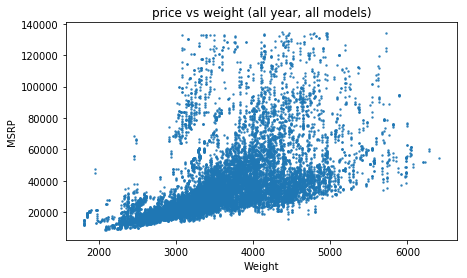

In [20]:
plt.figure(figsize=(7,4))
plt.plot(df['Weight'], df['MSRP'], marker='.', markersize=3, alpha=0.75, linestyle='none')
plt.xlabel('Weight')
plt.ylabel('MSRP')
plt.title('price vs weight (all year, all models)')
plt.show()

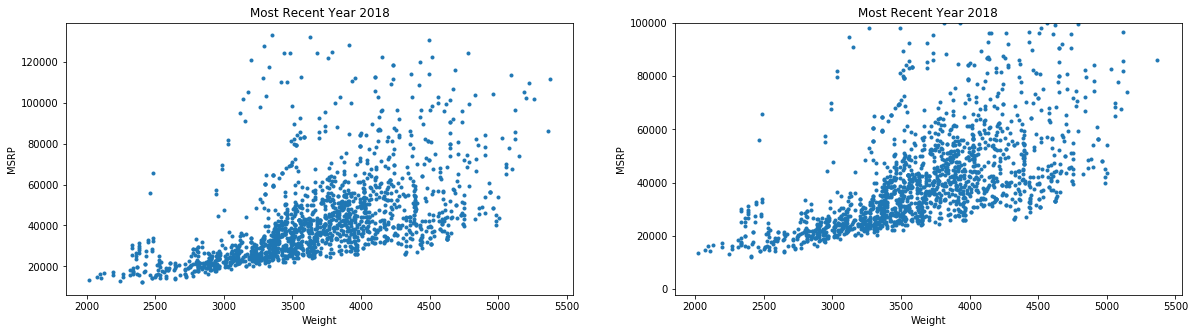

In [21]:
weight_2018 = df['Weight'].where(df['Year']==2018)
MSRP_2018 = df['MSRP'].where(df['Year']==2018)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax1 = ax[0]
ax2 = ax[1]

ax1.plot(weight_2018, MSRP_2018, '.')
ax1.set_xlabel('Weight')
ax1.set_ylabel('MSRP')
ax1.set_title('Most Recent Year 2018')

ax2.plot(weight_2018, MSRP_2018, '.')
ax2.set_ylim(-2200, 100000)
ax2.set_xlabel('Weight')
ax2.set_ylabel('MSRP')
ax2.set_title('Most Recent Year 2018')
plt.show()

#### It is noticed that the bottom one in the price range with the same weight is almost linearly proportional to price. 

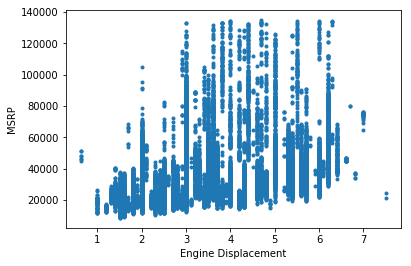

In [22]:
plt.plot(df['Displacement'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Engine Displacement')
plt.ylabel('MSRP')
plt.show()

With increasing engine displacement, there is a wider price range or model choices. 

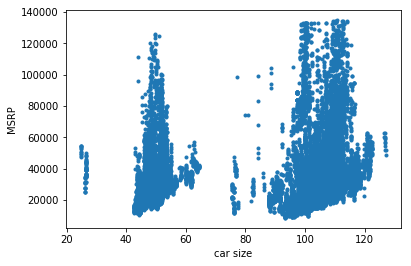

In [23]:
df_ = df[df['Size_avg'] != 0]
plt.plot(df_['Size_avg'], df_['MSRP'], marker='.', linestyle='none')
plt.xlabel('car size')
plt.ylabel('MSRP')
plt.show()

Car sizes are aggregated or clustered. No obvious trend for the price related to size.

In [24]:
df[essential_features][df['Size_avg']==0].head()

,Year,Model,Specs,MSRP,Weight,HP1,Displacement,Num_safety
282,1996,Acura NSX,Acura NSX Specs: 2-Door NSX Coupe Automatic,83000,NaN,NaN,NaN,3
283,1996,Acura NSX,Acura NSX Specs: 2-Door NSX-T Open Top Manual,83500,NaN,NaN,NaN,3
284,1996,Acura NSX,Acura NSX Specs: 2-Door NSX-T Open Top Automatic,87000,NaN,NaN,NaN,3
285,1996,Acura NSX,Acura NSX Specs: 2-Door NSX Coupe Manual,79500,NaN,NaN,NaN,3
286,1995,Acura NSX,Acura NSX Specs: 2-Door Sport Open Top Automatic,84500,NaN,NaN,NaN,3


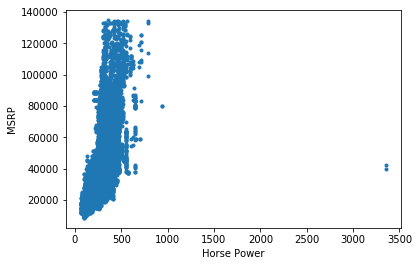

In [25]:
plt.plot(df['HP1'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Horse Power')
plt.ylabel('MSRP')
plt.show()

A single outlier was found to be about 3400 horsepower, which is unreasonable. The following code is to locate the entry and make correction.

In [26]:
# locate the outlier
df['HP1'][df['HP1'] > 3000]

5719    3350.0
5720    3350.0
Name: HP1, dtype: float64

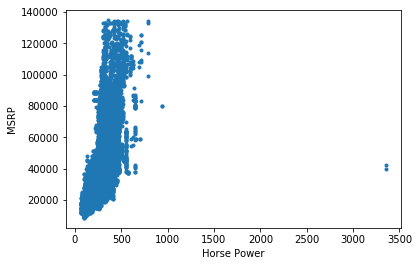

In [27]:
plt.plot(df['HP1'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Horse Power')
plt.ylabel('MSRP')
plt.show()

In [28]:
# decimal place was wrongly set; correct the value
df.loc[5719:5721, 'HP1'] = 335.0

In [29]:
df_ = df[['MSRP', 'HP1']].dropna()
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28174 entries, 0 to 32261
Data columns (total 2 columns):
MSRP    28174 non-null int64
HP1     28174 non-null float64
dtypes: float64(1), int64(1)
memory usage: 660.3 KB


In [30]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

def linregplt(feature_X, feature_y): # df['colname']
    X = feature_X.values.reshape(-1,1)
    y = feature_y.values.reshape(-1,1)
    
    # Create the regressor: reg
    reg = LinearRegression()

    # Create the prediction space
    prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

    # Fit the model to the data
    reg.fit(X, y)

    # Compute predictions over the prediction space: y_pred
    y_pred = reg.predict(prediction_space)

    # Print R^2 
    print('r^2:', reg.score(X, y))

    # Plot regression line
    plt.plot(X, y, marker='.', linestyle='none')
    plt.plot(prediction_space, y_pred, color='black', linewidth=3)


r^2: 0.43526393187


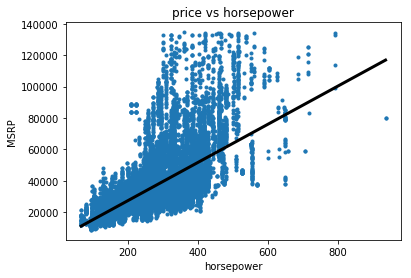

In [31]:
linregplt(df_['HP1'], df_['MSRP'])
plt.xlabel('horsepower')
plt.ylabel('MSRP')
plt.title('price vs horsepower')
plt.show()

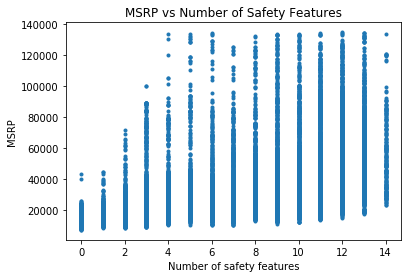

In [32]:
plt.plot(df['Num_safety'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Number of safety features')
plt.ylabel('MSRP')
plt.title('MSRP vs Number of Safety Features')
plt.show()

Number of safety features has no dramatic effect on car price.

r^2: 0.690107055284


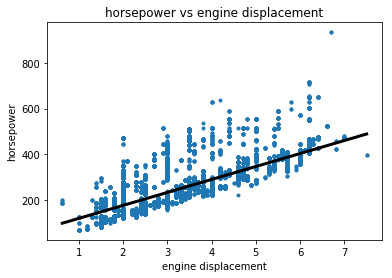

In [33]:
df_ = df[['Displacement', 'HP1']].dropna()
linregplt(df_['Displacement'], df_['HP1'])
plt.xlabel('engine displacement')
plt.ylabel('horsepower')
plt.title('horsepower vs engine displacement')
plt.show()

It can be seen that horsepower seems to increase with engine displacement, which agrees with physics.

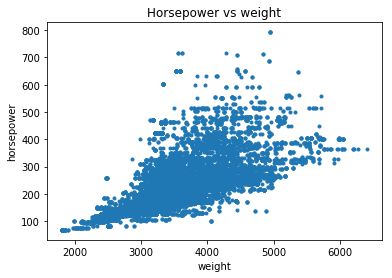

In [34]:
plt.plot(df['Weight'], df['HP1'], marker='.', linestyle='none')

plt.xlabel('weight')
plt.ylabel('horsepower')
plt.title('Horsepower vs weight')
plt.show()

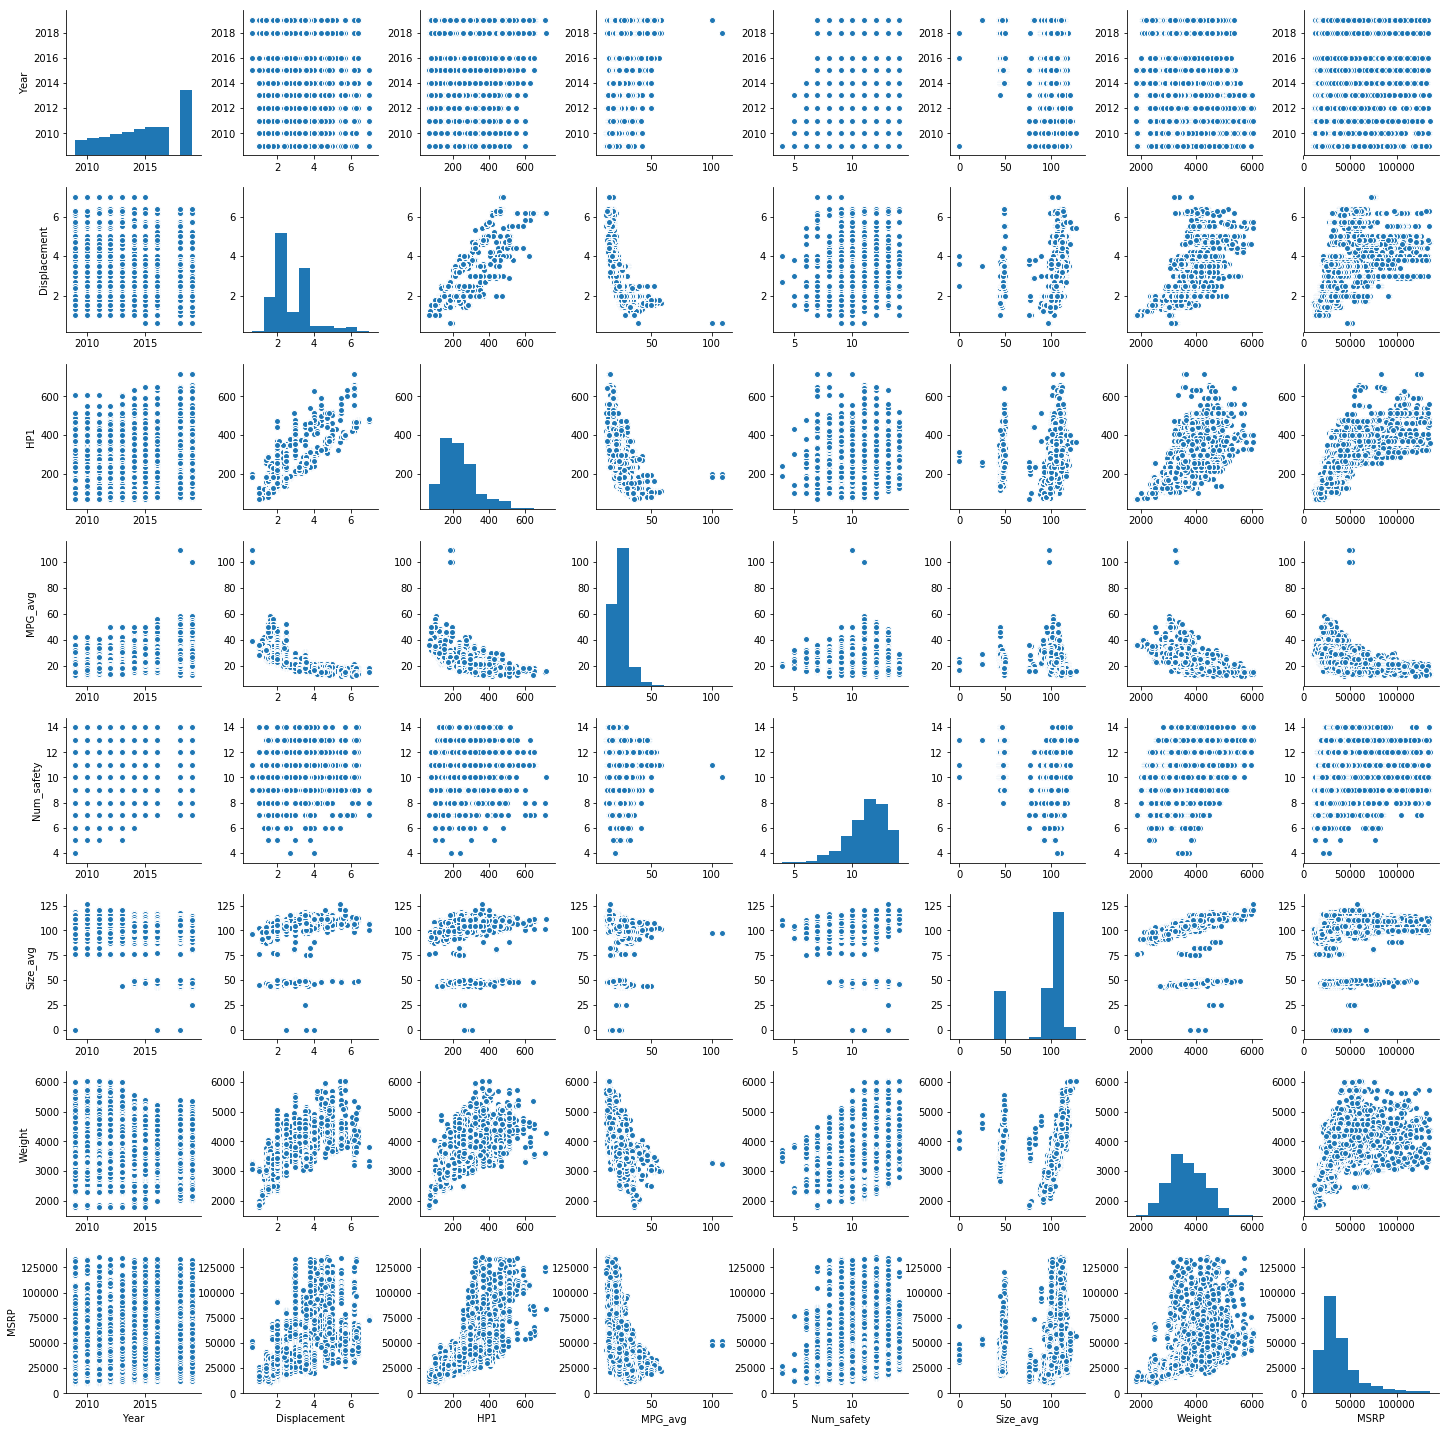

In [35]:
df_ = df[['Year','Displacement', 'HP1', 'MPG_avg', 'Num_safety', 'Size_avg', 'Weight', 'MSRP']]
df_ = df_.dropna()
sns.pairplot(df_)
plt.show()

In [36]:
df[['Year', 'Model', 'Specs', 'MSRP', 'EPA_Class', 'Body_Stype', 'Displacement', 'HP1', 'MPG_avg', 'Num_safety', 'Size_avg', 'Weight', 'MSRP']][df['MPG_avg']>80]

,Year,Model,Specs,MSRP,EPA_Class,Body_Stype,Displacement,HP1,MPG_avg,Num_safety,Size_avg,Weight,MSRP
2635,2019,BMW i3,BMW i3 Specs: s 120 Ah w/Range Extender,51500,Subcompact Cars,4dr Car,0.632,199.0,100.0,11,97.066667,3302.0,51500
2636,2019,BMW i3,BMW i3 Specs: 120 Ah w/Range Extender,48300,Subcompact Cars,4dr Car,0.632,184.0,100.0,11,97.033333,3269.0,48300
2639,2018,BMW i3,BMW i3 Specs: s 94 Ah w/Range Extender,51500,Subcompact Cars,4dr Car,0.632,199.0,109.0,10,97.066667,3278.0,51500
2640,2018,BMW i3,BMW i3 Specs: 94 Ah w/Range Extender,48300,Subcompact Cars,4dr Car,0.632,184.0,109.0,10,97.033333,3234.0,48300


- The above is all-electric cars, explaining why their MPG are outliers.

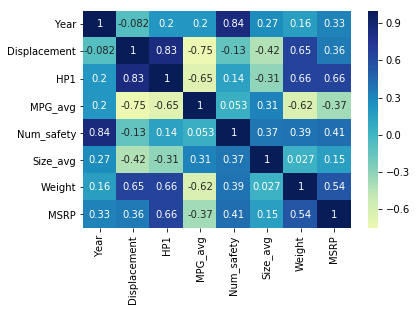

In [37]:
corr = df[['Year','Displacement', 'HP1', 'MPG_avg', 'Num_safety', 'Size_avg', 'Weight', 'MSRP']].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", center=0)
plt.show()

The heatmap confirms a positive correlation between horsepower and engine displacement.

## Explore correlations using 3-D Plots

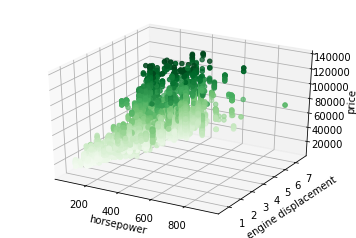

In [38]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Data for three-dimensional scattered points
xdata = df['HP1']
ydata = df['Displacement']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('horsepower')
ax.set_ylabel('engine displacement')
ax.set_zlabel('price')
plt.show()

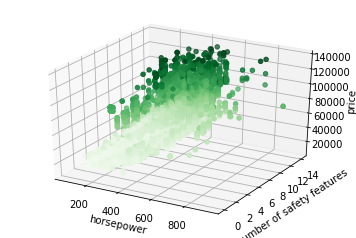

In [39]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['HP1']
ydata = df['Num_safety']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('horsepower')
ax.set_ylabel('number of safety features')
ax.set_zlabel('price')
plt.show()

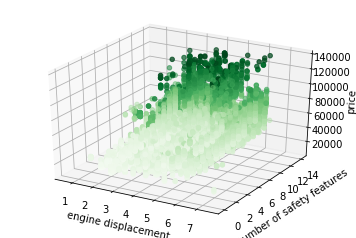

In [40]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['Displacement']
ydata = df['Num_safety']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('engine displacement')
ax.set_ylabel('number of safety features')
ax.set_zlabel('price')
plt.show()

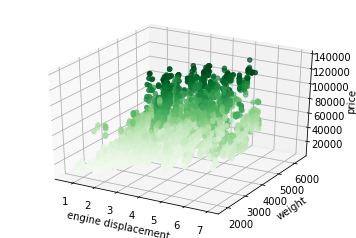

In [41]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['Displacement']
ydata = df['Weight']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('engine displacement')
ax.set_ylabel('weight')
ax.set_zlabel('price')
plt.show()

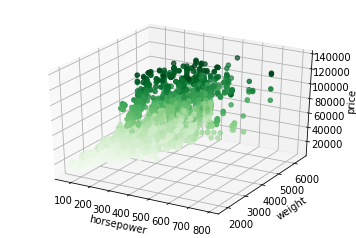

In [42]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['HP1']
ydata = df['Weight']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('price')
plt.show()

By exploring combination of any two different features to see their effect on MSRP in the 3D plots, it looks like the following features are well correlated to the car price,
- horsepower
- weight
- engine displacement
- number of safety features